# Tensorflow Tutorial

# 1 - Practice

In [59]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.python.framework import ops
# from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

$$cost = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [60]:
# 定义常量
y_hat = tf.constant(6, name = 'y_hat')
y = tf.constant(2, name = 'y')
# 定义变量
# (6 - 2) ^2 = 16
cost = tf.Variable((y_hat - y) ** 2, name = 'cost')
tf.print(cost)

16


In [61]:
c = tf.multiply(y_hat, y)
print(c) # tf.Tensor(12, shape=(), dtype=int32)
tf.print(c) # 12

tf.Tensor(12, shape=(), dtype=int32)
12


In [62]:
# 定义函数
@tf.function
def f(x):
    return 2 * x

print(f(3))

tf.Tensor(6, shape=(), dtype=int32)


## 1.1 - Linear Regression

In [63]:
def linear_regression ():
    np.random.seed(1)
    # Y = np.dot(W.T, X) + b
    X = np.random.randn(3, 1)
    W = np.random.randn(3, 4)
    b = np.random.randn(4, 1)
    Y = tf.add(tf.matmul(W.T, X), b)
    return Y
    
Y_pred = linear_regression()

## 1.2 - Sigmoid function

In [64]:
def sigmoid (Z):
    # 1 / (np.exp(-Z) + 1)
    return tf.sigmoid(Z)

sigmoid(np.random.randn(3, 1))

<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[0.64171493],
       [0.2496239 ],
       [0.75854586]])>

# 1.3 - Cost function

$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$


In [65]:
"""
def cost_function (A, Y):
    m = Y.shape[1]
    cost = - Y * np.log(A + 1e-7) - (1 - Y) * np.log(1 - A + 1e-7)
    return np.sum(cost) / m
"""
def cost_function (A, Y):
    return tf.nn.sigmoid_cross_entropy_with_logits(A, Y)

Y = tf.constant(np.random.randn(4, 1), name = 'y')
cost_function(Y_pred, Y)

<tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[2.40441885],
       [0.3684111 ],
       [5.08026603],
       [1.35428678]])>

# 1.4 - Initialize with zeros and ones

- tf.ones
- tf.zeros

In [66]:
def initialize_zeros_ones (shape):
    ones = tf.ones(shape)
    zeros = tf.zeros(shape)
    return ones, zeros

initialize_zeros_ones([2, 3])

(<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32)>)

## 1.5 - One Hot encodings

![image](https://github.com/Kulbear/deep-learning-coursera/raw/997fdb2e2db67acd45d29ae418212463a54be06d/Improving%20Deep%20Neural%20Networks%20Hyperparameter%20tuning,%20Regularization%20and%20Optimization/images/onehot.png)

例如列表有[1, 2, 0] 三个数字, 形成矩阵为
- 1: [0, 1, 0].T
- 2: [0, 0, 1].T
- 0: [1, 0, 0].T

In [100]:
def convert_to_one_hot (Y, C):
    return np.eye(C)[Y.reshape(-1)].T

def convert_to_one_hot_TF(Y, C):
    one_hot_matrix = tf.one_hot(indices = Y, depth = C, axis = 0)
    return one_hot_matrix

In [101]:
Y = np.array([1, 2, 0, 1, 3])
C = 4

print(convert_to_one_hot(Y, C))

[[0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [102]:
print(convert_to_one_hot_TF(Y, C))

tf.Tensor(
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]], shape=(4, 5), dtype=float32)


# 2 - Building NN in TF

## 2.1 - Load Data

In [104]:
def load_dataset():
    train_dataset = h5py.File('data/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
 
    test_dataset = h5py.File('data/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
 
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [105]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [108]:
def handle_data (X_train_orig, Y_train_orig, X_test_orig, Y_test_orig):
    # X flatten
    X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
    X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

    X_train_flatten = X_train_flatten / 255.
    X_test_flatten = X_test_flatten / 255.
    
    # Y softmax
    # [1, 2, 0] => softmax 变换
    Y_train = convert_to_one_hot(Y_train_orig, 6)
    Y_test = convert_to_one_hot(Y_test_orig, 6)
    
    return X_train_flatten, X_test_flatten, Y_train, Y_test

X_train_flatten, X_test_flatten, Y_train, Y_test = handle_data (X_train_orig, Y_train_orig, X_test_orig, Y_test_orig)

print(X_train_flatten.shape) # (12288, 1080)
print(Y_train.shape) # (6, 1080)


(12288, 1080)
(6, 1080)


Label:  2
Label:  [0. 0. 1. 0. 0. 0.]


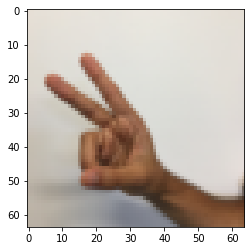

In [109]:
index = 6
plt.imshow(X_train_orig[index])
print('Label: ', np.squeeze(Y_train_orig[:, index]))
print('Label: ', Y_train[:, index])

## 2.2 - Initializing parameters

In [115]:
features = X_train_flatten.shape[0]
# softmax 输出6个数字
Layers = np.array([features, 25, 12, 6])

In [140]:
def init_parameters (Layers):
    np.random.seed(1)
    
    l_input = Layers[0]
    l_hidden_1 = Layers[1]
    l_hidden_2 = Layers[2]
    l_output = Layers[3]

    W1 = tf.Variable(np.random.randn(l_input, l_hidden_1))
    b1 = tf.Variable(np.zeros(shape = (l_hidden_1, 1)))
    
    W2 = tf.Variable(np.random.randn(l_hidden_1, l_hidden_2))
    b2 = tf.Variable(np.zeros(shape = (l_hidden_2, 1)))
    
    W3 = tf.Variable(np.random.randn(l_hidden_2, l_output))
    b3 = tf.Variable(np.zeros(shape = (l_output, 1)))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }
    return parameters


In [141]:
parameters = init_parameters (Layers)

## 2.3 - Forward Propagation

In [177]:
def forward_propagation (X, parameters):
    p = parameters
    W1 = p['W1']
    b1 = p['b1']
    
    W2 = p['W2']
    b2 = p['b2']
    
    W3 = p['W3']
    b3 = p['b3']
    
    # np.dot(W.T, X) + b
    Z1 = np.dot(tf.transpose(W1), X) + b1
    A1 = tf.nn.relu(Z1)
    
    Z2 = np.dot(tf.transpose(W2), A1) + b2
    A2 = tf.nn.relu(Z2)
    
    Z3 = np.dot(tf.transpose(W3), A2) + b3

    return Z3

In [179]:
Z3 = forward_propagation(X_train_flatten, parameters)

## 2.4 - Cost Function